## Домашнее задание по летней практике № 2

Ахметзянов Д.Р.
М8О-202Б-21

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
import scipy.optimize as sc

In [ ]:
%matplotlib widget

## Работа с матрицами

1)	Считайте два числа. Это размеры матрицы из нулей. Считайте ещё одно число n. Создайте и напечатайте матрицу, в центре которой лежит первая матрица с нулями, вокруг неё – единицы, вокруг них – двойки, и так до этого n. Пример: 2 3; 3 ->


In [ ]:
row, col, n = (int(input()) for _ in range(3))
matrix = np.zeros((row, col), dtype = int) 
matrix

In [ ]:
for i in range(1, n + 1):
    matrix = np.pad(matrix, pad_width=1, mode='constant', constant_values=i)
matrix

2)	Считайте два числа – размер матрицы. Считайте элементы этой матрицы. К ней сверху и справа присоедините куски с наибольшими значениями по столбцам и по строкам, соответственно. В незадействованный уголок вставьте 0.

In [ ]:
row, col = int(input()), int(input())
a = np.array([list(map(int, input().split())) for _ in range(row)])
a

In [ ]:
a_max_col = a.max(axis = 0)
a_max_str = a.max(axis = 1).reshape(2, 1)
a_zeros = np.zeros([1,1], dtype = int)
np.block([[a_max_col, a_zeros], [a, a_max_str]])

3)	Считайте два числа – размер матрицы. Считайте элементы этой матрицы. Если матрица не квадратная, посчитайте определитель наибольшей квадратной подматрицы. Таких подматриц будет много – выведите на печать максимальное значение определителя для них, и отвечающую ему подматрицу.

In [ ]:
row, col = int(input()), int(input())
a = np.array([list(map(int, input().split())) for _ in range(row)])
a

In [ ]:
answer = {}

In [ ]:
if col == row:
    print('Squared matrix')
else:
    for i in range(abs(row - col) + 1):
        if row > col:
            det = int(np.linalg.det(a[i:min(row, col)+i, 0:min(row, col)]))
            submatrix = a[i:min(row, col)+i, 0:min(row, col)]
            answer[det] = submatrix
        else:
            det = int(np.linalg.det(a[0:min(row, col), i:min(row, col)+i]))
            submatrix = a[0:min(row, col), i:min(row, col)+i]
            answer[det] = submatrix
    key = max(answer)
    print(key, answer[key], sep='\n')





4)	Считайте размеры матрицы (они должны быть чётными). Считайте элементы матрицы. Поменяйте чётные и нечётные элементы местами – сначала столбцы, потом строки

In [ ]:
row, col = int(input()), int(input())
if row % 2 != 0 or col % 2 != 0:
    print('Numbers is odd')
else:
    a = np.array([list(map(int, input().split())) for _ in range(row)])
b = a.copy()
b

In [ ]:
a[:, ::2], a[:, 1::2] = b[:, 1::2], b[:, ::2]
a

In [ ]:
c = a.copy()
a[::2], a[1::2] = c[1::2], c[::2]
a

5
![](4photo.png)

In [ ]:
row, col = int(input()), int(input())
a = np.array([list(map(int, input().split())) for _ in range(row)])
a

In [ ]:
answer = np.array([np.std(a[i]) for i in range(col)]) # стандартное отклонение
answer

## Символьные вычисления 

1)	Считайте функцию от символьной переменной t. Считайте два числа – пределы изменения t. Выведите график этой функции, график её производной и интеграла

In [ ]:
t = sp.Symbol('t')
function_input = input()
function = sp.simplify(function_input) #перевод из строки в функцию
function_diff = sp.diff(function_input, t) #производная функции
function_intregral = sp.integrate(function_input, t) # интерграл функции
print(f'{function = }', f'{function_diff = }', f'{function_intregral = }', sep = '\n')

In [ ]:
a, b = int(input()), int(input()) #границы функции
axiss = np.linspace(a, b, 100)
a, b

In [ ]:
sp.plotting.plot((function, (t, a, b)))

In [ ]:
sp.plotting.plot((function_diff, (t, a, b)))

In [ ]:
sp.plotting.plot((function_intregral, (t, a, b)))

2) Считайте две функции от переменной x. Выведите их графики, график их разности и умножения.


In [ ]:
x = sp.Symbol('x')
function_input1, function_input2  = input(), input()
function_difference = sp.simplify(function_input1) - sp.simplify(function_input2) # функция разности
function_prod = sp.simplify(function_input1) * sp.simplify(function_input2) # функция произведения
print(f'{function_difference=}', f'{function_prod=}', sep = '\n')

In [ ]:
sp.plotting.plot((function_difference, (x, -10, 10)))

In [ ]:
sp.plotting.plot((function_prod, (x, -10, 10)))

3) Считайте функцию от x. Считайте вторую функцию от t, и подставьте её вместо икса в первую. Постройте график полученной фукции для t=[0,10], а также график её производной.


In [2]:
x, t = sp.symbols('x, t')
function_input1, function_input2 = input(), input()
f = sp.simplify(function_input1) # перевод из строки в функцию
# подставляем вторую функцию как аргумент для первой
function = sp.Subs(f, x, sp.simplify(function_input2)).doit()
function_diff = sp.diff(function, t)
print(f'{function_input1=}', f'{function_input2=}', f'{function=}', f'{function_diff = }', sep = '\n')

function_input1='sin(t) + 1 / 2 * sin(2*t)'
function_input2='-10 '
function=(cos(t) + 1)*sin(t)
function_diff = (cos(t) + 1)*cos(t) - sin(t)**2


In [ ]:
sp.plotting.plot((function, (t, -10, 10)), note = f'{function = }')

In [ ]:
sp.plotting.plot((function_diff, (t, -10, 10)))

4) Считайте функцию от символьной переменной t. Считайте два числа – пределы изменения t. Выведите график этой функции, а также точками отметьте на графике её экстремумы.


In [3]:
t = sp.Symbol('t')
function_input = input()
function = sp.simplify(function_input) # перевод из строки в функцию
function_diff = sp.diff(function, t) # производная функции
print(f'{function=}', f'{function_diff =}', sep = '\n')


function=(cos(t) + 1)*sin(t)
function_diff =(cos(t) + 1)*cos(t) - sin(t)**2


In [7]:
equation = sp.Eq(function_diff, 0) # создение уравнения
solution = sp.solve(equation, t) # находение экстремумов
print(f'{equation=}', f'{solution=}', sep = '\n')

equation=Eq((cos(t) + 1)*cos(t) - sin(t)**2, 0)
solution=[-pi/3, pi/3]


In [8]:
function_draw = sp.lambdify(t, function) # перевод функции из sympy в python

In [9]:
a, b = int(input()), int(input())
delta_t = np.linspace(a, b, 100) # делим ось икс по
delta_f = [function_draw(i) for i in delta_t] # подставляем значения в функцию

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable cos method

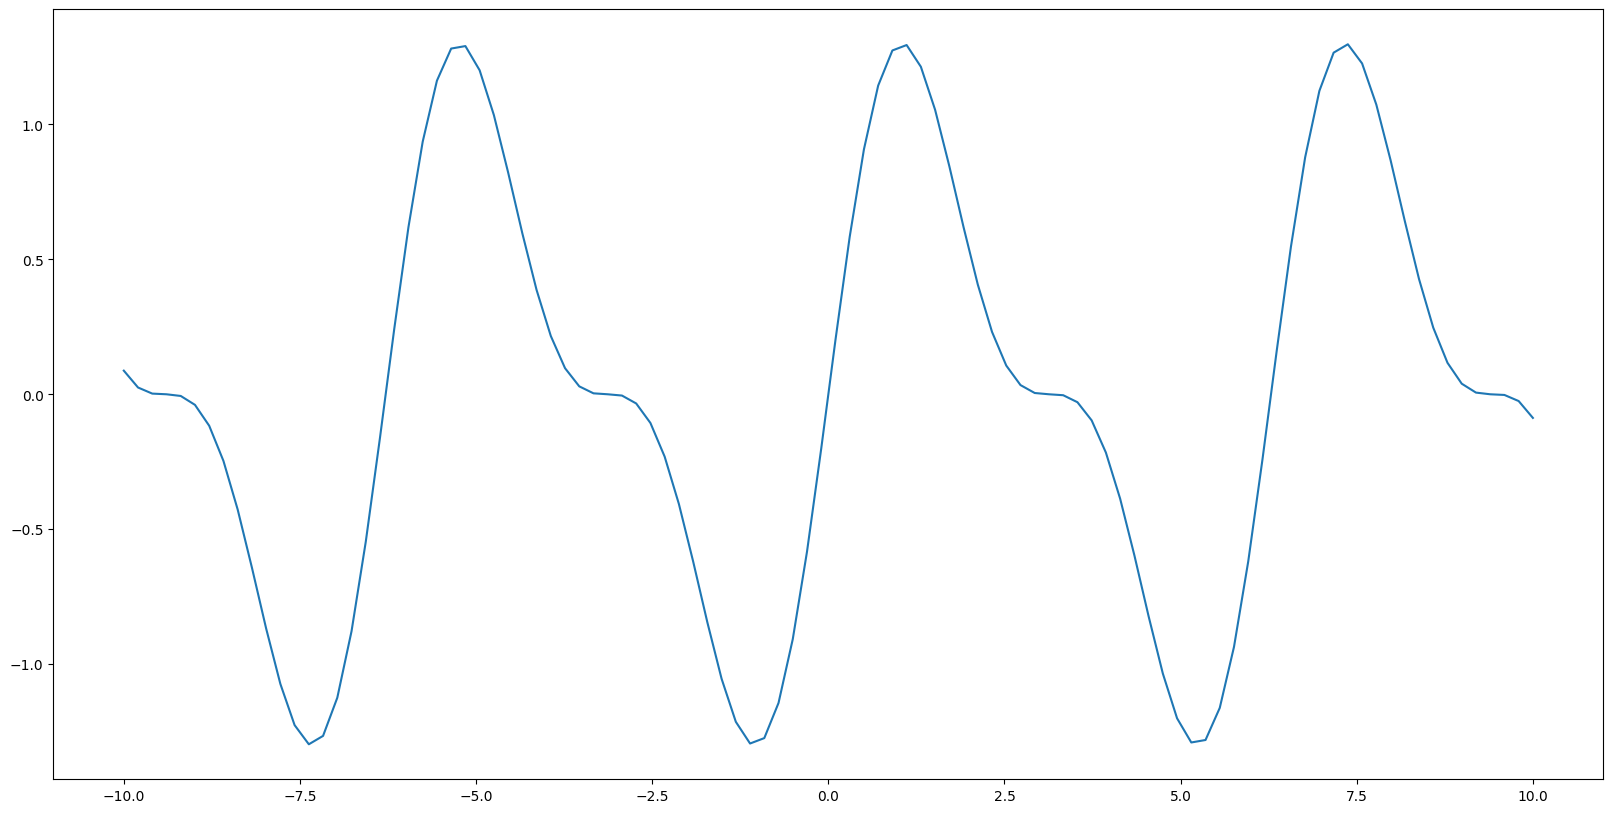

In [10]:
plt.figure(figsize = (20, 10))
plt.plot(delta_t, delta_f)
for i in range(len(solution)):
    min_max = solution[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'red')
    plt.hlines(function_draw(min_max), min_max - 1, min_max + 1, color = 'black')
    plt.text(min_max-1, function_draw(min_max), 'DERIVATIVE', ha='right', va='center')
plt.xlim([a, b])
plt.title('Function')
plt.grid()
plt.show()

5) Считайте функцию от символьной переменной x. Считайте два числа – пределы изменения t. Выведите график этой функции, а также точками отметьте на графике её корни.

In [ ]:
x = sp.Symbol('x')
function_input = input()
function = sp.simplify(function_input) # перевод из строки в функцию
print(f'{function=}')

In [ ]:
equation = sp.Eq(function) # создание уравнения
solution = sp.solve(equation, x) # решение уравнения
print(f'{equation=}', f'{solution=}', sep = '\n')

In [ ]:
function_draw = sp.lambdify(x, function) # перевод из sympy в python

In [ ]:
a, b = int(input()), int(input())
delta_t = np.linspace(a, b, 100) # делим ось икс по
delta_f = [function_draw(i) for i in delta_t] #подставляем значения в функцию

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(delta_t, delta_f)
plt.hlines(0, a, b, color = 'black')
for i in range(len(solution)):
    min_max = solution[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'red')
    plt.text(min_max- 0.2, function_draw(min_max), 'Solution', ha='right', va='center')
plt.xlim([a, b])
plt.title('Function')
plt.grid()
plt.show()

![](6photo.png)

In [ ]:
x, y=sp.symbols('x, y')
equation1 = sp.Eq(x ** 2 -2 * y ** 2 - x * y + 2 * x - y + 1, 0) # создание уравнения
equation2 = sp.Eq(2 * x ** 2 - y ** 2 + x * y + 3 * y -5, 0) # создание уравнения
solution = sp.solve([equation1, equation2], [x, y])
solution


In [ ]:
values = {'x': [i[0] for i in solution],
          'y': [i[1] for i in solution]}

In [ ]:
dataframe = pd.DataFrame(values)
dataframe

![](11photo.png)

In [ ]:
x = sp.Symbol('x')
f = sp.symbols('f', cls = sp.Function) # создание функции

equation = sp.Eq(f(x).diff(x, 1) * x + x ** 2 + f(x) * x - f(x), 0)    
print(sp.dsolve(equation))  # Решение диффура
solution = sp.dsolve(equation).rhs
print(solution)
ASubsed=[]
C = [-10, 1, 0, 4]
for v in C:
    ASubsed.append(sp.Subs(solution,'C1', v).doit())
sp.plotting.plot((ASubsed[0],(x,-3,3)),(ASubsed[1],(x,-3,3)),(ASubsed[2],(x,-3,3)),(ASubsed[3],(x,-3,3)),line_color='red')

## Численное решение уравнений

5) Постройте график функци f(x) = log(sin(x)+1.5)-0.01*x**2, и численно найдите корни уравнения f(x)=0.


In [ ]:
x = sp.Symbol('x')
function = sp.simplify('log(sin(x)+1.5)-0.01*x**2')
function_draw = sp.lambdify(x, function)
function

In [ ]:
delta_t = np.linspace(-100, 100, 1000) # делим ось икс по
delta_f = [function_draw(i) for i in delta_t] # подставляем значения в функцию

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(delta_t, delta_f)
plt.title('Function')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
plt.xlim([-15, 15])
plt.ylim([-2, 2])
plt.plot(delta_t, delta_f)
plt.title('Function')
plt.grid()
plt.plot([delta_t[0],delta_t[-1]],[0,0])

print(sc.root(function_draw, -6.3).x) # численное решение уравнения. Зависит от начальной точки.
print(sc.root(function_draw, -2.7).x)
print(sc.root(function_draw, -0.5).x)
print(sc.root(function_draw, 3.5).x) 
print(sc.root(function_draw, 6.3).x)
print(sc.root(function_draw, 8.7).x)

![](61photo.png)

In [ ]:
def odesys(x,t):
    dx0 = 2 * x[0] + x[1] ** 2 - 1
    dx1 = 6 * x[0] - x[1] ** 2 + 1 
    return [dx0, dx1]
x0 = [1, 0]
t = np.linspace(0, 1, 1001)
X = odeint(odesys, x0, t)
print(X)
plt.figure(figsize = (20, 10))
plt.plot(X[:,1], X[:,0])   #фазовая траектория
plt.plot(t, X[:,1], color='red')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Решение системы дифуров')
plt.grid()
plt.legend(["x(t)", "V(t)"])
plt.show()

In [ ]:
def odesys(x,t,A,B):
    dx0 = 2 * A * x[0] + x[1] ** 2 - 1 + 0 * np.sin(t) #ВАЖНО: добавляйте и зануляйте функцию от t
    dx1 = 6 * B * x[0] - x[0] ** 2 + 1
    return [dx0,dx1]
x0 = [1,0]
t = np.linspace(0, 1000, 10001)
X = odeint(odesys, x0, t, (-0.01, 0.1))   #odeint(odesys,x0,t,(-0.01,0.1)) - (cсисcтема, нач. точка, массив времени, параметры (a,b))
plt.figure(figsize = (17, 8))
plt.plot(t, X[:, 0])
plt.plot(t, X[:, 1], color='red')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Решение системы дифуров')
plt.grid()
plt.legend(["x(t)", "V(t)"])
plt.show()

x01=[-1, 0]
X1=odeint(odesys, x01, t, (-0.01, 0.1))

x02=[0, 1]
X2=odeint(odesys, x02, t, (-0.01, 0.1))

x03=[0, -1]
X3=odeint(odesys, x03, t, (-0.01,0.1))

fig = plt.figure(figsize = (17, 8))
ax = fig.add_subplot(1, 1, 1)
P0 = ax.plot(X[0,0],X[0,1], 'o', color = 'red')[0]
ax.plot(X[:,0],X[:,1], color = 'red')
P1 = ax.plot(X1[0,0],X1[0,1], 'o', color='blue')[0]
ax.plot(X1[:,0],X1[:,1], color='blue')
P2 = ax.plot(X2[0,0],X2[0,1],'o', color='green')[0]
ax.plot(X2[:,0],X2[:,1], color='green')
P3 = ax.plot(X3[0,0],X3[0,1], 'o')[0]
ax.plot(X3[:,0],X3[:,1])
#ax.xlabel('X0')
#ax.ylabel('X1')
#ax.title('Фазовая кривая')
#ax.grid()
#ax.legend(["x0 = [1,0]"])
ax.axis('equal')

def kino(i):
    P0.set_data(X[i,0],X[i,1])
    P1.set_data(X1[i,0],X1[i,1])
    P2.set_data(X2[i,0],X2[i,1])
    P3.set_data(X3[i,0],X3[i,1])
    return [P0, P1, P2, P3]

multik = FuncAnimation(fig,kino,interval=20,frames=len(t))

plt.show()